In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [47]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [48]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Quora_Data/train.csv")
data.shape

(404290, 6)

## Initial EDA

In [49]:
data.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
52698,52698,93271,93272,Why do we use signatures for authorization? Wh...,How can I make the same signature each time?,0
397297,397297,337400,530408,What happens in a penalty shootout if all elev...,Can a player score directly from a throw-in in...,0
65958,65958,114396,114397,What is the problem with database optimization?,Is there any book about optimizing databases?,0
247029,247029,54155,45109,How to change education system in India?,What can we do to improve the Indian education...,0
117288,117288,190863,190710,Which is the best inspiring autobiography novel?,What is the best inspirational quote of all time?,0


In [50]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [51]:
data=data.dropna()

0    255024
1    149263
Name: is_duplicate, dtype: int64


<Axes: >

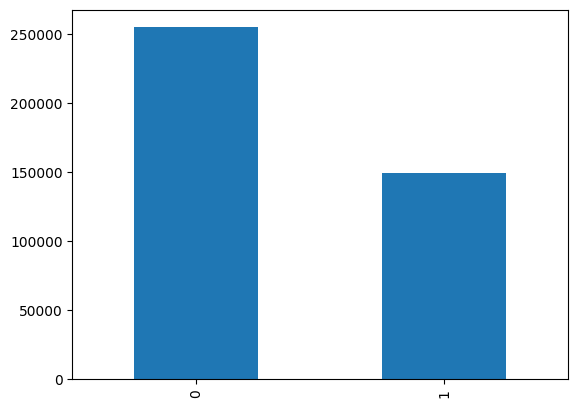

In [52]:
print(data['is_duplicate'].value_counts())
(data['is_duplicate'].value_counts()).plot(kind='bar')

In [53]:
qid=pd.Series(data['qid1'].tolist()+data['qid2'].tolist())
print("No of unique Questions ",len(np.unique(qid)))
result = pd.Series(qid.value_counts(), name='count')
duplicates = result[result > 1].sum()
print("No of duplicate Questions ",duplicates)

No of unique Questions  537929
No of duplicate Questions  382423


## Sampling

In [54]:
df=data.sample(30000)

In [55]:
df=df.reset_index(drop=True)
ques_df=df[['question1','question2','is_duplicate']]
ques_df.head()

,question1,question2,is_duplicate
0,What should you do if you feel alone?,What do you do when you feel lonely?,0
1,Can you treat a cat with Advantage II for Dogs?,Are cats smarter than dogs?,0
2,How will demonetization of ‎₹1000 and ‎₹500 no...,"How would abolishing Rs. 500,1000 notes help i...",1
3,How can we measure the curvature caused by a m...,What skills/technologies should a electrical f...,0
4,My friend is the victim of an anonymous cyber ...,What is the actual responsibility of the job p...,0


## Preprocessing

In [56]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
    "'ve": " have",
    "n't": " not",
    "'re":" are",
    "'ll": " will",
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q

In [57]:
ques_df['question1']=ques_df['question1'].apply(preprocess)
ques_df['question2']=ques_df['question2'].apply(preprocess)

## Feature Engineering

In [58]:
ques_df['q1_len']=ques_df['question1'].str.len()
ques_df['q2_len']=ques_df['question2'].str.len()

In [59]:
ques_df['q1_num_words']=ques_df['question1'].apply(lambda q1: len(q1.split()))
ques_df['q2_num_words']=ques_df['question2'].apply(lambda q2: len(q2.split()))

In [60]:
def cal_common_words(row):
  q1_words=set(row['question1'].lower().strip().split())
  q2_words=set(row['question2'].lower().strip().split())
  return len(q1_words & q2_words)

In [61]:
ques_df['common_words']=ques_df.apply(cal_common_words,axis=1)

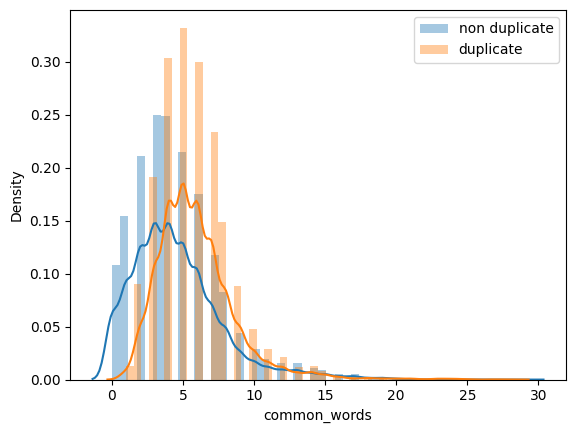

In [62]:
sns.distplot(ques_df[ques_df['is_duplicate'] == 0]['common_words'],label='non duplicate')
sns.distplot(ques_df[ques_df['is_duplicate'] == 1]['common_words'],label='duplicate')
plt.legend()
plt.show()

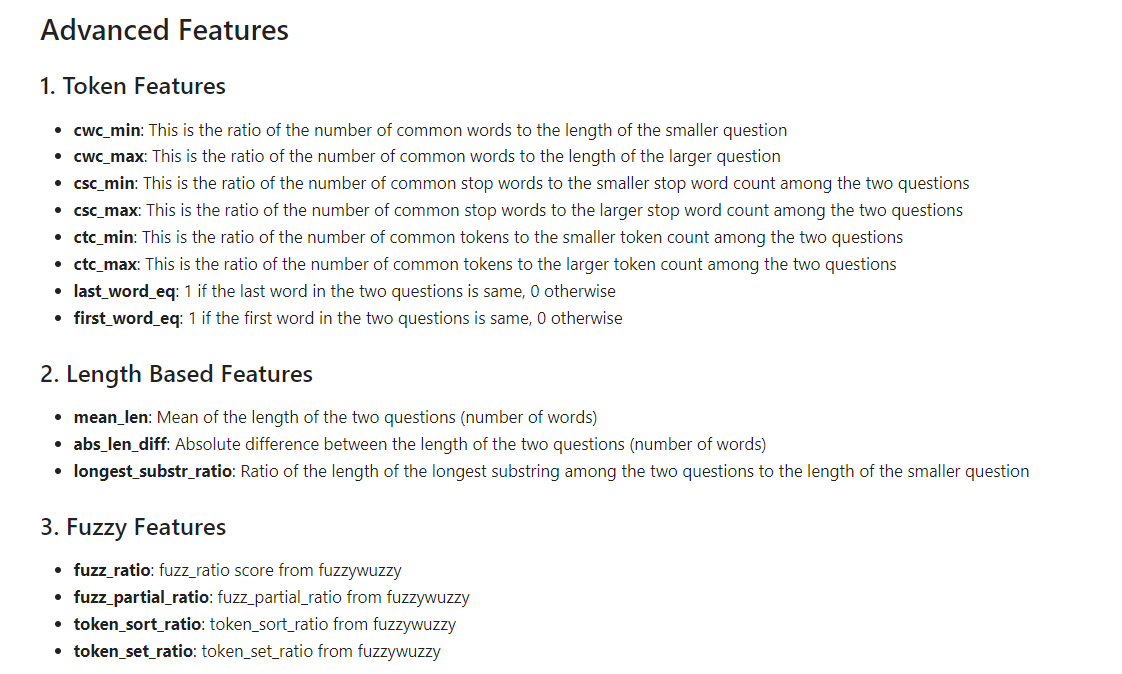

In [63]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [64]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
token_features = ques_df.apply(fetch_token_features, axis=1)

ques_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
ques_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
ques_df["csc_min"]       = list(map(lambda x: x[2], token_features))
ques_df["csc_max"]       = list(map(lambda x: x[3], token_features))
ques_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
ques_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
ques_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
ques_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [66]:
!pip install distance

In [67]:
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features


In [68]:
length_features = ques_df.apply(fetch_length_features, axis=1)

ques_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
ques_df['mean_len'] = list(map(lambda x: x[1], length_features))
ques_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [69]:
!pip install fuzzywuzzy

In [70]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [71]:
fuzzy_features = ques_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
ques_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
ques_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
ques_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
ques_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [85]:
new_features.corr()['is_duplicate']

is_duplicate            1.000000
q1_len                 -0.163400
q2_len                 -0.160952
q1_num_words           -0.152529
q2_num_words           -0.161799
common_words            0.207874
cwc_min                 0.398778
cwc_max                 0.404163
csc_min                 0.214458
csc_max                 0.213790
ctc_min                 0.364253
ctc_max                 0.352262
last_word_eq            0.308266
first_word_eq           0.199635
abs_len_diff           -0.201173
mean_len               -0.183945
longest_substr_ratio    0.258089
fuzz_ratio              0.380380
fuzz_partial_ratio      0.355994
token_sort_ratio        0.379374
token_set_ratio         0.394751
Name: is_duplicate, dtype: float64

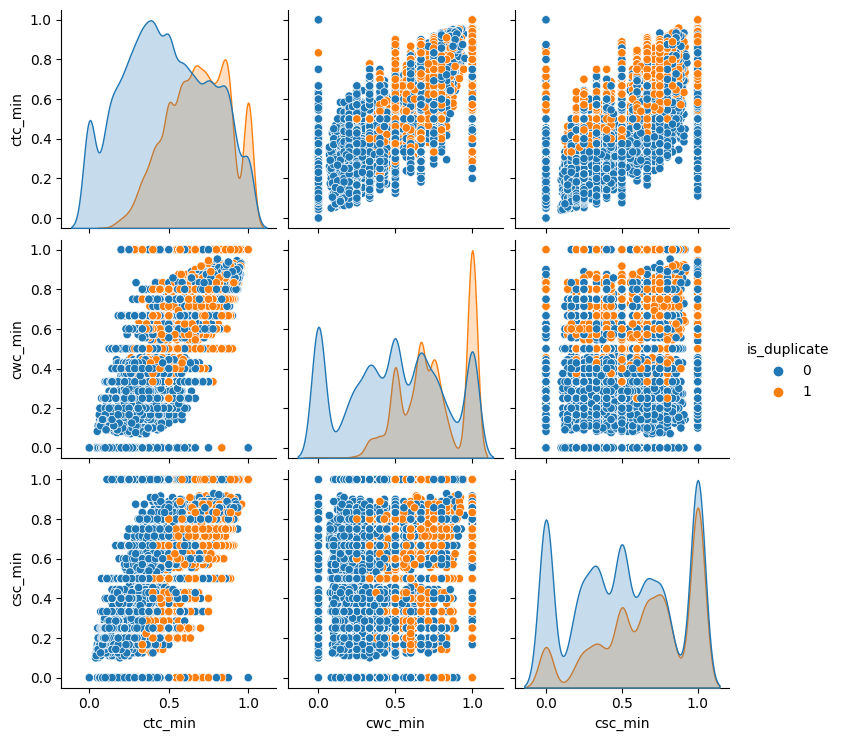

In [73]:
sns.pairplot(new_features[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

In [74]:
ques_df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,what should you do if you feel alone,what do you do when you feel lonely,0,36,35,8,8,4,0.499975,0.499975,...,0.499994,0.0,1.0,0.0,8.0,0.277778,79,77,70,77
1,can you treat a cat with advantage ii for dogs,are cats smarter than dogs,0,46,26,10,5,1,0.333322,0.199996,...,0.099999,1.0,0.0,5.0,7.5,0.185185,47,46,44,47
2,how will demonetization of rupee 1k and ru...,how would abolishing rs 500 1k notes help in ...,1,110,104,19,18,11,0.545450,0.461535,...,0.578944,0.0,1.0,1.0,18.5,0.076190,31,26,57,65
3,how can we measure the curvature caused by a m...,what skills technologies should a electrical f...,0,71,88,14,13,1,0.000000,0.000000,...,0.071428,0.0,0.0,1.0,13.5,0.041667,18,23,25,25
4,my friend is the victim of an anonymous cyber ...,what is the actual responsibility of the job p...,0,98,83,21,14,3,0.000000,0.000000,...,0.142856,0.0,0.0,7.0,17.5,0.095238,28,35,42,39


## BOW

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
questions=list(ques_df['question1'])+list(ques_df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)
# from sklearn.feature_extraction.text import TfidfVectorizer
# questions=list(ques_df['question1'])+list(ques_df['question2'])
# tfidf = TfidfVectorizer(max_features=3000)
# q1_arr,q2_arr=np.vsplit(tfidf.fit_transform(questions).toarray(),2)

In [76]:
temp_df1 = pd.DataFrame(q1_arr)
temp_df2 = pd.DataFrame(q2_arr)
new_df = pd.concat([temp_df1, temp_df2,new_features], axis=1)
new_df.shape

(30000, 6021)

In [77]:
X=new_df.drop('is_duplicate',axis=1)
y=new_df['is_duplicate']

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X.values,y,test_size=0.2,random_state=13)

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7861666666666667